<a href="https://colab.research.google.com/github/moqri/gene-regulatory-network/blob/master/01_Alon_et_al_PNAS_1999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Broad patterns of gene expression revealed by clustering analysis of tumor and normal colon tissues probed by oligonucleotide arrays

https://www.pnas.org/content/96/12/6745

Figure 1.

![alt text](https://www.pnas.org/content/pnas/96/12/6745/F1.medium.gif
)

Replication using data from https://www.pnas.org/content/95/25/14863

In [1]:
!wget -nc -O array.xls https://www.pnas.org/highwire/filestream/584765/field_highwire_adjunct_files/1/3917data.xls 

File ‘array.xls’ already there; not retrieving.


In [2]:
import pandas as pd
array=pd.read_excel('array.xls',index_col=0,skiprows=2)
array.head()

,NAME,alpha 0,alpha 7,alpha 14,alpha 21,alpha 28,alpha 35,alpha 42,alpha 49,alpha 56,alpha 63,alpha 70,alpha 77,alpha 84,alpha 91,alpha 98,alpha 105,alpha 112,alpha 119,Elu 0,Elu 30,Elu 60,Elu 90,Elu 120,Elu 150,Elu 180,Elu 210,Elu 240,Elu 270,Elu 300,Elu 330,Elu 360,Elu 390,cdc15 10,cdc15 30,cdc15 50,cdc15 70,cdc15 90,cdc15 110,cdc15 130,cdc15 150,cdc15 170,cdc15 190,cdc15 210,cdc15 230,cdc15 250,cdc15 270,cdc15 290,spo 0,spo 2,spo 5,spo 7,spo 9,spo 11,spo5 2,spo5 7,spo5 11,spo- early,spo- mid,heat 0,heat 10,heat 20,heat 40,heat 80,heat 160,dtt 15,dtt 30,dtt 60,dtt 120,cold 0,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
ORF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,-0.06,-0.06,-0.14,-0.18,-0.06,-0.25,0.06,-0.12,0.25,0.43,0.21,-0.04,-0.15,-0.04,0.21,-0.14,-0.03,-0.07,-0.36,-0.14,-0.42,-0.34,-0.23,-0.17,0.23,0.30,0.41,-0.07,-0.23,-0.12,0.16,0.74,0.14,-0.49,-0.32,0.19,0.23,0.24,0.28,1.13,-0.12,0.10,NaN,0.66,0.62,0.08,0.62,0.43,0.50,-0.25,-0.51,-0.67,0.21,-0.74,-0.36,-0.01,0.38,0.15,-0.22,-0.09,0.33,0.08,0.39,-0.17,0.23,0.20,0.20,-0.17,-0.69,0.14,-0.27
YOR357C,GRD19 SECRETION GOLGI PROTEIN RETENTION,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,-0.51,-0.67,-0.62,-0.58,-0.38,-0.94,-0.34,-0.92,-0.15,0.03,0.16,-0.34,-0.32,-0.34,-0.12,-0.34,-0.27,-0.15,-0.15,-0.51,-0.30,-0.25,-0.12,-0.40,0.98,0.99,0.25,0.15,0.08,0.23,0.18,-0.29,-0.45,0.01,-0.34,-1.12,-0.54,-0.94,-1.09,-0.45,-0.23,-0.36,0.08,0.28,0.18,-0.12,NaN,0.25,-0.22,-0.04,-0.25,0.04,-0.03,-0.07,-0.04,0.73,-0.06,0.54,-0.09,-0.29,-0.10,0.36,-0.20,-0.34,-0.14,-0.09,0.06,-0.17,0.04,-0.97,-1.79
YLR292C,SEC72 SECRETION ER PROTEIN TRANSLOCATI...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,-0.14,-0.14,-0.38,-0.22,0.12,-0.43,-0.42,-0.45,-0.17,-0.27,0.29,-0.09,0.40,-0.10,0.46,0.15,-0.17,-0.18,-0.07,-0.34,0.30,-0.12,-0.06,-0.17,0.07,0.38,0.34,NaN,-0.15,-0.20,0.19,0.37,0.24,-0.07,NaN,0.24,0.45,0.23,0.50,-0.07,NaN,0.66,0.94,0.46,0.06,-0.18,0.39,-0.18,0.16,0.55,-0.06,-0.94,0.21,-0.71,-0.86,-0.45,0.42,1.04,0.65,0.53,-0.47,0.21,-0.29,-0.36,-0.10,-0.29,-0.18,-0.34,-0.47,-0.43,-1.06
YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SUBUNIT,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,NaN,0.01,-0.10,-0.17,-0.12,-0.43,-0.18,0.06,-0.20,-0.22,-0.04,0.34,0.42,-0.04,-0.14,0.15,0.26,0.40,0.24,0.25,0.37,-0.04,-0.27,0.11,-0.15,-0.07,0.06,0.23,0.07,-0.12,-0.12,NaN,0.04,0.25,0.10,0.30,-0.12,-0.23,-0.12,0.19,0.24,NaN,0.41,0.36,0.98,-0.04,0.18,0.24,0.44,0.32,-0.22,-0.71,-0.34,-0.45,-0.30,-0.45,0.58,-0.22,0.10,0.19,-0.32,-0.01,-0.29,0.31,0.21,0.07,0.18,-0.14,-0.20,-0.43,-1.51
YIL118W,RHO3 CYTOSKELETON GTP-BINDING PROTEIN...,0.04,0.01,-0.81,NaN,-0.30,0.49,0.08,0.19,-0.03,-0.32,-0.34,-0.22,-0.03,-0.06,0.06,0.07,0.10,0.03,-0.18,-0.20,-0.12,0.16,-0.17,0.10,-0.14,-0.01,-0.15,0.04,0.23,-0.04,0.07,0.06,0.70,0.36,0.37,0.30,-0.04,0.19,-0.45,0.21,-1.12,-0.04,0.30,0.88,-0.49,-0.23,-0.04,-0.20,0.45,0.52,0.62,0.48,0.65,-0.14,-0.14,-0.49,-0.04,0.14,-0.10,-0.20,0.01,-0.40,-0.23,-0.04,0.25,-0.27,0.10,0.10,-0.20,0.28,-0.17,0.26,0.07,-0.17,NaN,-0.10,-0.23,-0.51,-1.40


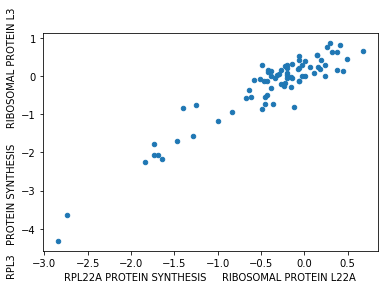

In [3]:
import re
cleaned_names=[re.sub('  ', '_',name).split('_')[-1].strip() for name in array.NAME ]
array.index=array.NAME
array.drop('NAME',1).transpose().plot.scatter(1599,1619)